# Hacktoberfest 2024 Hackathon Score Normalization

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
import scipy.stats as stats

In [64]:
panel_number = int(input().strip())
panel_scores_csv_path = f"marksheets/panel{panel_number:02}.csv"
panel_scores = pd.read_csv(panel_scores_csv_path)
panel_scores = panel_scores.dropna(how="all").reset_index(drop=True)
# rename columns to lowercase, trimmed
panel_scores.columns = panel_scores.columns.str.strip().str.lower()
panel_scores = panel_scores.ffill()
panel_scores

,team no,judges,technology,design,presentation,collaboration,implementation,total,collective total
0,110.0,Smt. Satya Kiranmai,2.0,2.0,2.0,2.0,2.0,2.0,1.7
1,110.0,Mr.Madhukar,2.0,1.0,2.0,1.0,1.0,1.4,1.7
2,67.0,Smt. Satya Kiranmai,4.0,5.0,4.0,4.0,4.0,4.2,4.2
3,67.0,Mr.Madhukar,4.0,4.0,4.0,5.0,4.0,4.2,4.2
4,123.0,Smt. Satya Kiranmai,2.0,1.0,1.0,1.0,1.0,1.2,1.2
5,123.0,Mr.Madhukar,2.0,1.0,1.0,1.0,1.0,1.2,1.2
6,147.0,Smt. Satya Kiranmai,3.0,2.0,2.0,3.0,3.0,2.6,2.6
7,147.0,Mr.Madhukar,3.0,2.0,3.0,2.0,3.0,2.6,2.6
8,186.0,Smt. Satya Kiranmai,4.0,4.0,4.0,4.0,5.0,4.2,4.4
9,186.0,Mr.Madhukar,4.0,5.0,4.0,5.0,5.0,4.6,4.4


In [15]:
raw_team_scores = panel_scores.groupby("team no")["total"].mean().reset_index()
raw_team_scores = raw_team_scores.rename(columns={"total": "raw_avg"})
raw_team_scores

,team no,raw_avg
0,50.0,4.4
1,67.0,4.2
2,97.0,3.6
3,103.0,3.0
4,110.0,1.7
5,123.0,1.2
6,147.0,2.6
7,177.0,3.1
8,186.0,4.4


In [4]:
# Normalize the scores for each metric and then calculate the average score for each panelist
panel_scores_normalized = panel_scores.groupby("judges")[
        ["technology", "design", "presentation", "collaboration", "implementation", "total"]
    ].transform(lambda x: stats.zscore(x))
panel_scores_normalized.columns += "_norm"
panel_scores_normalized["raw_avg_norm"] = panel_scores_normalized["total_norm"]
panel_scores_normalized.drop(columns="total_norm", inplace=True)
panel_scores_normalized["indiv_norm_avg"] = panel_scores_normalized.mean(axis=1)
panel_scores_normalized["judges"] = panel_scores["judges"]
panel_scores_normalized["team no"] = panel_scores["team no"].astype(int)
panel_scores_normalized

,technology_norm,design_norm,presentation_norm,collaboration_norm,implementation_norm,raw_avg_norm,indiv_norm_avg,judges,team no
0,-1.555635,-0.929670,-0.894427,-1.010153,-1.069045,-1.097232,-1.092694,Smt. Satya Kiranmai,110
1,-1.555635,-1.500000,-1.060660,-1.435916,-1.641350,-1.501457,-1.449170,Mr.Madhukar,110
2,0.989949,1.352247,1.118034,0.808122,0.534522,0.991729,0.965767,Smt. Satya Kiranmai,67
3,0.989949,0.750000,1.060660,1.148733,0.691095,0.955473,0.932652,Mr.Madhukar,67
4,-1.555635,-1.690309,-1.900658,-1.919290,-1.870829,-1.856854,-1.798929,Smt. Satya Kiranmai,123
5,-1.555635,-1.500000,-2.121320,-1.435916,-1.641350,-1.676952,-1.655196,Mr.Madhukar,123
6,-0.282843,-0.929670,-0.894427,-0.101015,-0.267261,-0.527515,-0.500455,Smt. Satya Kiranmai,147
7,-0.282843,-0.750000,0.000000,-0.789754,-0.086387,-0.448487,-0.392912,Mr.Madhukar,147
8,0.989949,0.591608,1.118034,0.808122,1.336306,0.991729,0.972625,Smt. Satya Kiranmai,186
9,0.989949,1.500000,1.060660,1.148733,1.468576,1.306462,1.245730,Mr.Madhukar,186


In [5]:
# Overall average score for each team
team_scores = panel_scores_normalized.groupby("team no")[["raw_avg_norm", "indiv_norm_avg"]].mean().reset_index()
team_scores

,team no,raw_avg_norm,indiv_norm_avg
0,50,1.163506,1.123437
1,67,0.973601,0.949209
2,97,0.425500,0.430124
3,103,-0.122601,-0.122197
4,110,-1.299344,-1.270932
5,123,-1.766903,-1.727062
6,147,-0.488001,-0.446684
7,177,-0.034853,-0.045073
8,186,1.149096,1.109178


In [17]:
team_scores["raw_avg_norm_cdf_scaled"] = stats.norm.cdf(
    team_scores["raw_avg_norm"]) * 5
team_scores["indiv_norm_avg_cdf_scaled"] = stats.norm.cdf(
    team_scores["indiv_norm_avg"]) * 5
team_scores["raw_avg"] = raw_team_scores["raw_avg"]
team_scores

,team no,raw_avg_norm,indiv_norm_avg,raw_avg_norm_cdf_scaled,indiv_norm_avg_cdf_scaled,raw_avg
0,50,1.163506,1.123437,4.388440,4.346870,4.4
1,67,0.973601,0.949209,4.174363,4.143715,4.2
2,97,0.425500,0.430124,3.323819,3.332236,3.6
3,103,-0.122601,-0.122197,2.256058,2.256857,3.0
4,110,-1.299344,-1.270932,0.484564,0.509382,1.7
5,123,-1.766903,-1.727062,0.193111,0.210391,1.2
6,147,-0.488001,-0.446684,1.563872,1.637759,2.6
7,177,-0.034853,-0.045073,2.430492,2.410123,3.1
8,186,1.149096,1.109178,4.373709,4.331616,4.4


In [7]:
team_scores_sorted_by_ran = team_scores.sort_values(
    "raw_avg_norm", ascending=False)[["team no", "raw_avg_norm", "raw_avg_norm_cdf_scaled"]]
team_scores_sorted_by_ina = team_scores.sort_values(
    "indiv_norm_avg", ascending=False)[["team no", "indiv_norm_avg", "indiv_norm_avg_cdf_scaled"]]

# display both sorted dataframes side by side
from IPython.display import display_html
ran_styler = team_scores_sorted_by_ran.style.set_table_attributes("style='display:inline; margin-right: 3rem'").set_caption("Sorted by raw_avg_norm")
ina_styler = team_scores_sorted_by_ina.style.set_table_attributes("style='display:inline'").set_caption("Sorted by indiv_norm_avg")
display_html(ran_styler._repr_html_() + ina_styler._repr_html_(), raw=True)

team_scores_sorted_by_ran_cdf = team_scores_sorted_by_ran.sort_values(
    "raw_avg_norm_cdf_scaled", ascending=False)
team_scores_sorted_by_ina_cdf = team_scores_sorted_by_ina.sort_values(
    "indiv_norm_avg_cdf_scaled", ascending=False)

# display both sorted dataframes side by side
ran_cdf_styler = team_scores_sorted_by_ran_cdf.style.set_table_attributes(
    "style='display:inline; margin-right: 3rem'").set_caption("Sorted by raw_avg_norm_cdf_scaled")
ina_cdf_styler = team_scores_sorted_by_ina_cdf.style.set_table_attributes(
    "style='display:inline'").set_caption("Sorted by indiv_norm_avg_cdf_scaled")
display_html(ran_cdf_styler._repr_html_() +
             ina_cdf_styler._repr_html_(), raw=True)

,team no,raw_avg_norm,raw_avg_norm_cdf_scaled
0,50,1.163506,4.388440
8,186,1.149096,4.373709
1,67,0.973601,4.174363
2,97,0.425500,3.323819
7,177,-0.034853,2.430492
3,103,-0.122601,2.256058
6,147,-0.488001,1.563872
4,110,-1.299344,0.484564
5,123,-1.766903,0.193111
,team no,indiv_norm_avg,indiv_norm_avg_cdf_scaled


,team no,raw_avg_norm,raw_avg_norm_cdf_scaled
0,50,1.163506,4.388440
8,186,1.149096,4.373709
1,67,0.973601,4.174363
2,97,0.425500,3.323819
7,177,-0.034853,2.430492
3,103,-0.122601,2.256058
6,147,-0.488001,1.563872
4,110,-1.299344,0.484564
5,123,-1.766903,0.193111
,team no,indiv_norm_avg,indiv_norm_avg_cdf_scaled


## Vizualization of the score normalization process

In [24]:
# Melting the dataframe for seaborn
team_scores_melted = pd.melt(
    team_scores, id_vars=["team no"], value_vars=["raw_avg_norm_cdf_scaled", "indiv_norm_avg_cdf_scaled", "raw_avg"])

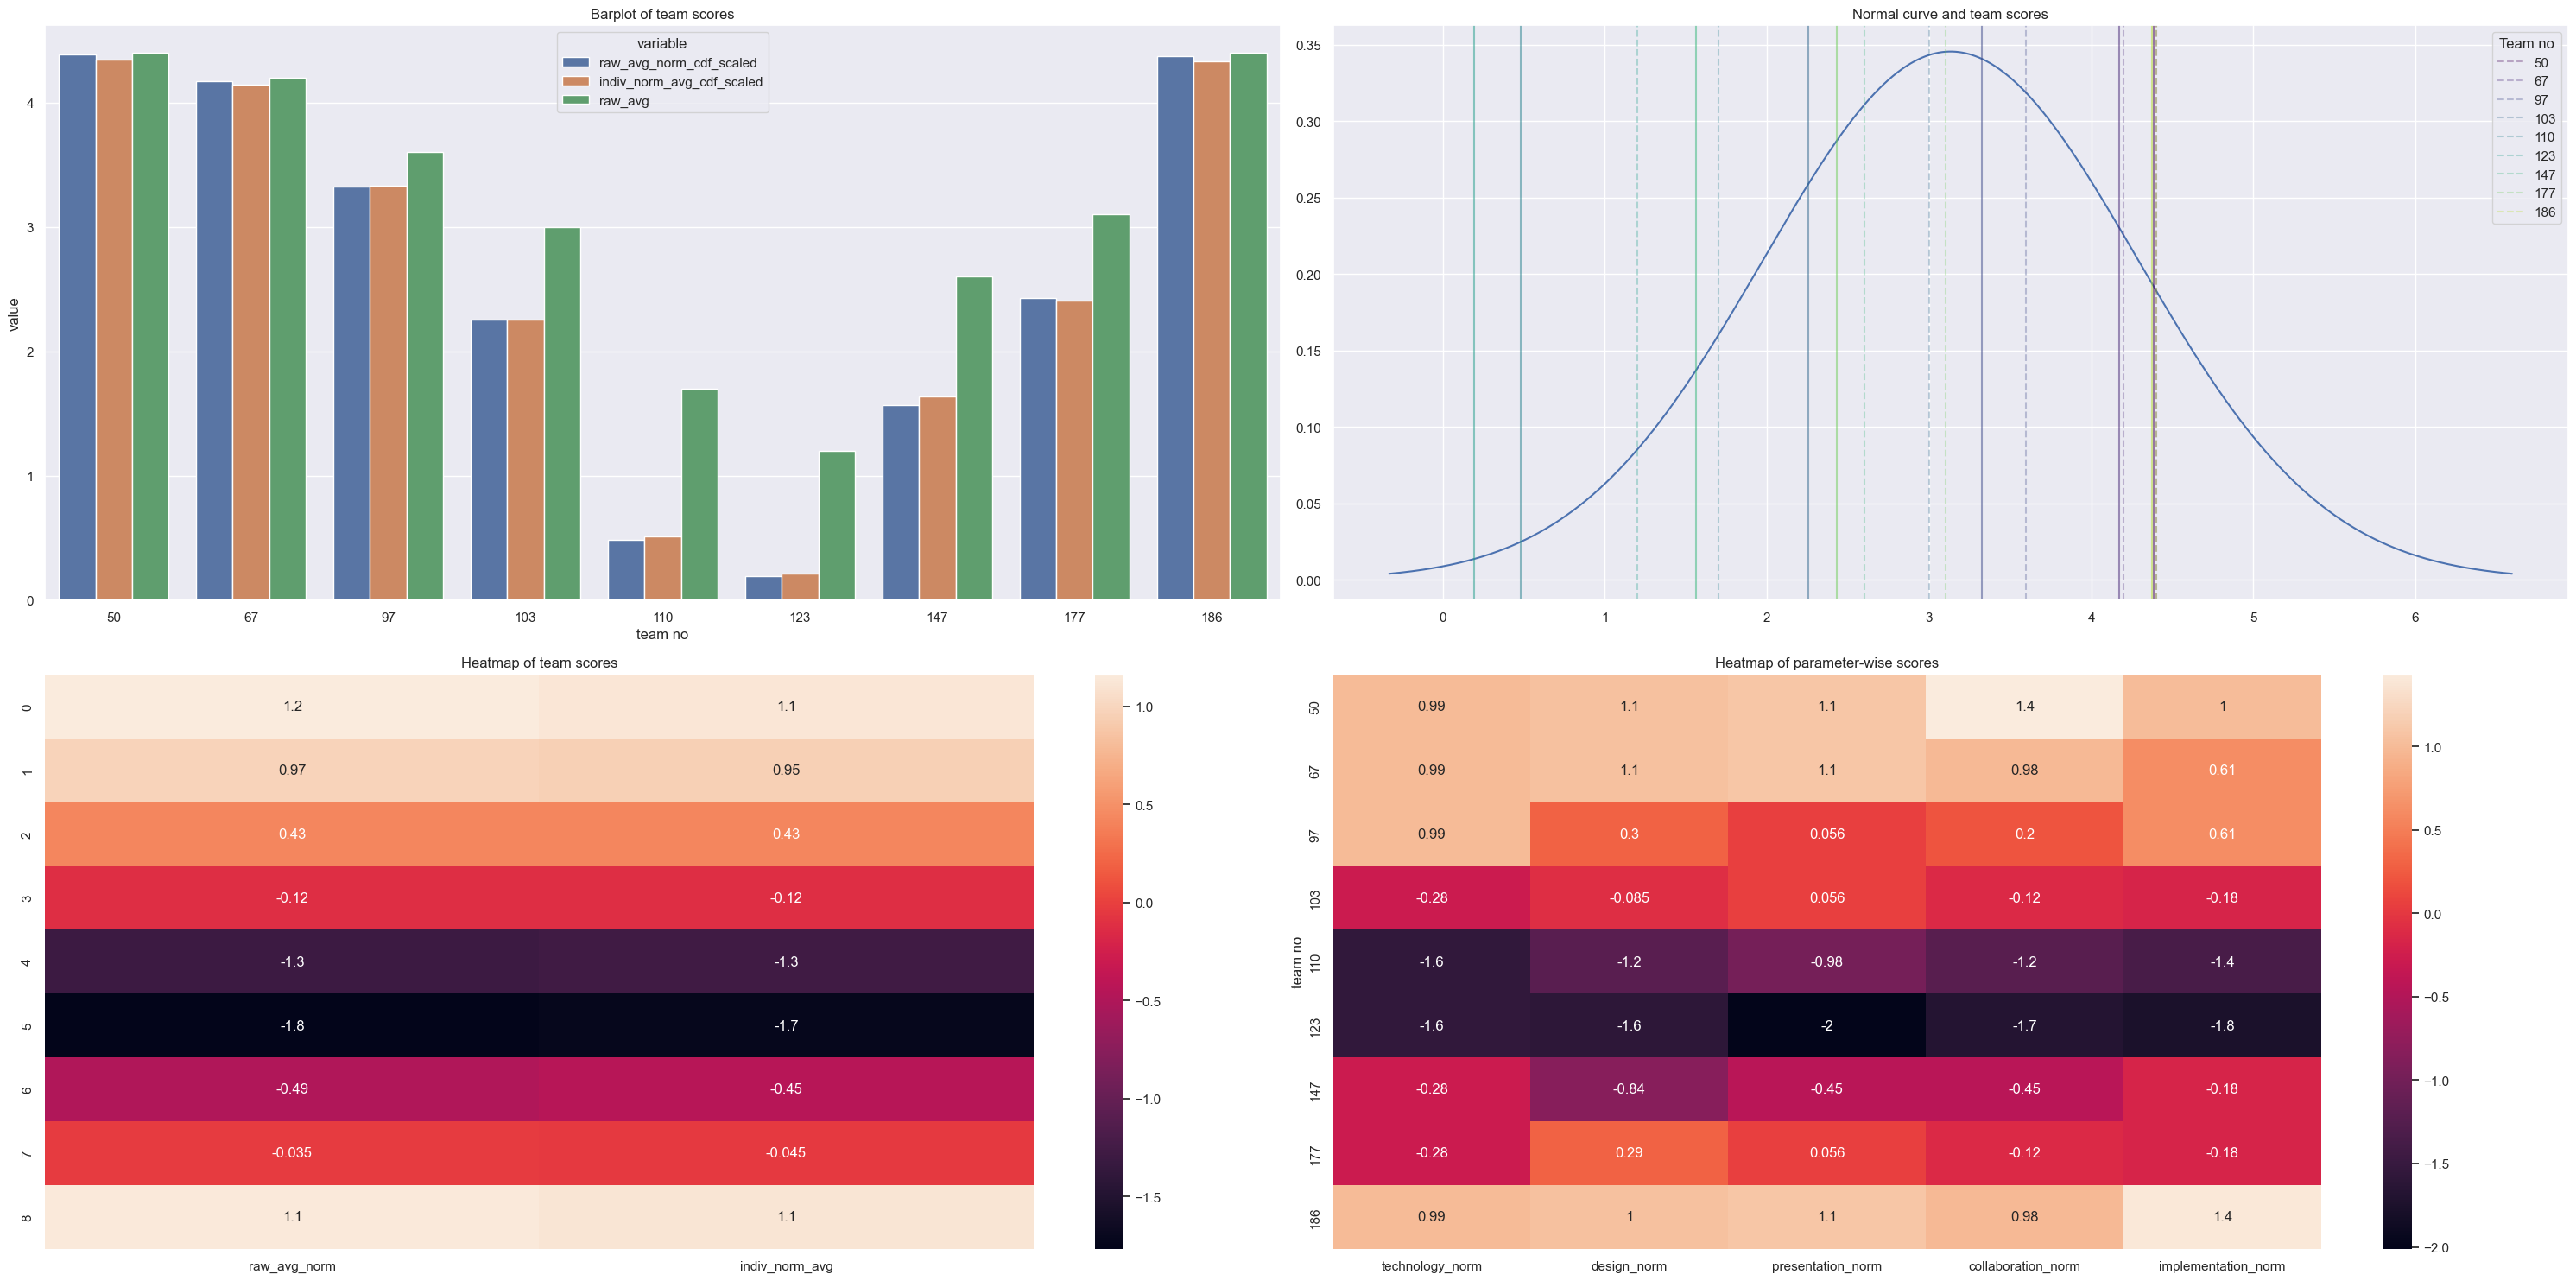

In [75]:
# draw a normal curve using sns
sns.set_theme()
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
sns.barplot(data=team_scores_melted, x="team no",
            y="value", hue="variable", ax=ax[0, 0])
# Normal curve
m = team_scores["raw_avg"].mean()
s = team_scores["raw_avg"].std()
l = m - 3 * s
u = m + 3 * s
sns.lineplot(x=np.linspace(l, u, 1000), y=stats.norm.pdf(np.linspace(l, u, 1000), m, s), ax=ax[0, 1])
for row in team_scores.itertuples():
    # draw a vertical line at the raw_avg colored by team no
    ax[0, 1].axvline(row.raw_avg, linestyle="--", label=row._1, alpha=0.3, color=colormaps['viridis'](row.Index/len(team_scores)))
    ax[0, 1].axvline(row.raw_avg_norm_cdf_scaled, alpha=0.5,
                  color=colormaps['viridis'](row.Index/len(team_scores)))
ax[0, 0].set_title("Barplot of team scores")
ax[0, 1].set_title("Normal curve and team scores")
ax[0, 1].legend(title="Team no")
# Heatmap of team scores
sns.heatmap(team_scores[["raw_avg_norm", "indiv_norm_avg"]], annot=True, ax=ax[1, 0])
# Heatmap of parameter-wise scores for each team
sns.heatmap(panel_scores_normalized.groupby("team no")[
            ["technology_norm", "design_norm", "presentation_norm", "collaboration_norm", "implementation_norm"]].mean(), annot=True, ax=ax[1, 1])
ax[1, 0].set_title("Heatmap of team scores")
ax[1, 1].set_title("Heatmap of parameter-wise scores")
plt.tight_layout()
fig.savefig(f"normalized_results/panel{panel_number:02}/{panel_number:02}.png")
# plt.show()

## Export results to a CSV file

In [68]:
# export the dataframes
team_scores_path = f"normalized_results/panel{panel_number:02}/{panel_number:02}_normalized_team_scores.csv"
team_scores.to_csv(team_scores_path, index=False)
team_scores_sorted_path = f"normalized_results/panel{panel_number:02}/{panel_number:02}_normalized_team_scores_sorted.csv"
team_scores_sorted = team_scores.sort_values("indiv_norm_avg_cdf_scaled", ascending=False)
team_scores_sorted.to_csv(team_scores_sorted_path, index=False)